#  Deep Learning Hyper-parameters

## Regularization

In [4]:
#import the packages
import pandas as pd
import numpy as np

The data set

In [5]:
x=[-0.99768,-0.69574,-0.40373,-0.10236,0.22024,0.47742,0.82229]
y=[2.0885,1.1646,0.3287,0.46013,0.44808,0.10013,-0.32952]

input_data = pd.DataFrame(list(zip(x, y)), columns =['x', 'y']) 
print(input_data)

         x        y
0 -0.99768  2.08850
1 -0.69574  1.16460
2 -0.40373  0.32870
3 -0.10236  0.46013
4  0.22024  0.44808
5  0.47742  0.10013
6  0.82229 -0.32952


Plotting the data

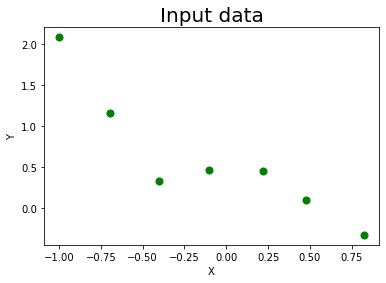

In [6]:
x = np.array(input_data.x)
y = input_data.y
#scatter plot x and y
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Input data", fontsize=20)
plt.scatter(x,y,s=50,c="g")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Usual Regression Model building - Without Regualrization

#### Simple Linear Regression

In [7]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
m1 = sm.OLS(y,x1).fit()
#SSE
print("m1 SSE", m1.ssr)

m1 SSE 0.7107401451797565


#### Second Order polynomial regression

In [8]:
x2 = sm.add_constant(np.column_stack([x,np.square(x)]))
m2 = sm.OLS(y,x2).fit()
print("m2 SSE", m2.ssr)

m2 SSE 0.45723172052129896


#### Fifth order polynomial

In [9]:
x3 = sm.add_constant(np.column_stack([x, np.power(x,2),np.power(x,3),np.power(x,4),np.power(x,5)]))
m3 = sm.OLS(y,x3).fit()
print("m3 SSE", m3.ssr)

m3 SSE 0.010562888801624615


### Regression Model building - With Regualrization

In [10]:
X = x3
y = np.array(y)
n_col = X.shape[1]
d = np.identity(n_col)
d[0,0] = 0
w = []

reg =0 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y))[0])

reg =1 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y))[0])


reg =10 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y))[0])


C:\Users\SREEHARI\AppData\Local\Temp\ipykernel_15448\1298214204.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y))[0])
C:\Users\SREEHARI\AppData\Local\Temp\ipykernel_15448\1298214204.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y))[0])
C:\Users\SREEHARI\AppData\Local\Temp\ipykernel_15448\1298214204.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M

In [11]:
print("Regularized weights  lambda=0 \n", w[0])
print("Regularized weights  lambda=1 \n", w[1])
print("Regularized weights  lambda=10 \n", w[2])

Regularized weights  lambda=0 
 [ 0.47252877  0.68135289 -1.38012842 -5.97768747  2.44173268  4.73711433]
Regularized weights  lambda=1 
 [ 0.3975953  -0.42066637  0.12959211 -0.3974739   0.17525553 -0.33938772]
Regularized weights  lambda=10 
 [ 0.52047074 -0.18250706  0.06064258 -0.14817721  0.07433006 -0.12795737]


In [12]:
#new weights and older weights
print("Regularized Weights With lambda = 0 \n", list(w[0]))
print("Standard Weights With inbuilt package \n",list(m3.params))

Regularized Weights With lambda = 0 
 [0.4725287728743471, 0.6813528948567897, -1.3801284186125349, -5.977687467469833, 2.4417326847935117, 4.7371143348316815]
Standard Weights With inbuilt package 
 [0.47252877287434, 0.6813528948567658, -1.3801284186124518, -5.977687467469686, 2.4417326847933998, 4.737114334831525]


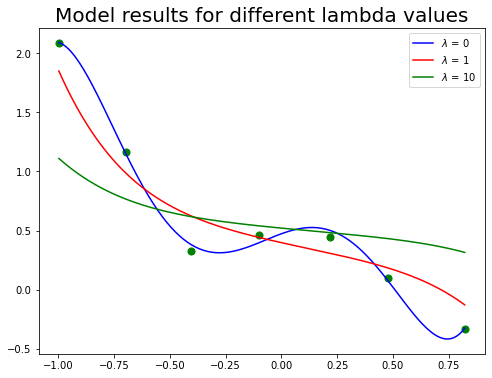

In [13]:
#ploat all these three models
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Model results for different lambda values', fontsize=20)
plt.scatter(x,y, s = 50, c = "g")
x_new = np.linspace(x.min(), x.max(), 200)
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[0]), 5))(x_new),label='$\lambda$ = 0', c = "b")
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[1]), 5))(x_new),label='$\lambda$ = 1', c = "r")
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[2]), 5))(x_new),label='$\lambda$ = 10', c = "g")
plt.legend(loc='upper right');
plt.show()

#### Choosing the regularization λ

In [14]:
#weights
print("Final Weights \n", w[1])
#perdiction
pred = X.dot(w[1])
##SSE
SSE_Final = sum(np.square(y-pred))
print("Final SSE ", SSE_Final)

Final Weights 
 [ 0.3975953  -0.42066637  0.12959211 -0.3974739   0.17525553 -0.33938772]
Final SSE  0.24363202160352707


## Regularization in Keras

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
## MNIST data The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


## Model without Regularization 

In [19]:
model = keras.Sequential()
model.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3744 - accuracy: 0.8931
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1646 - accuracy: 0.9499
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1154 - accuracy: 0.9647
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0890 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0725 - accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0610 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9842
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0435 - accuracy: 0.9867
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0385 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.032

In [21]:
#Final Results
loss, acc = model.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 1s - loss: 0.0345 - accuracy: 0.9898
Train Accuracy: 98.98%
313/313 - 0s - loss: 0.0899 - accuracy: 0.9759
Test Accuracy: 97.59%


## Model with Regularization 

In [22]:
from tensorflow.keras import regularizers
model_r = keras.Sequential()
model_r.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.l2(0.01)))
model_r.add(layers.Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model_r.add(layers.Dense(10, activation='softmax'))
model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_r.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_r.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7759 - accuracy: 0.6396
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3373 - accuracy: 0.7615
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2272 - accuracy: 0.7806
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1672 - accuracy: 0.7879
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1271 - accuracy: 0.7945
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0952 - accuracy: 0.7981
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0645 - accuracy: 0.8035
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0323 - accuracy: 0.8108
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0039 - accuracy: 0.8160
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.976

In [24]:
#Final Results
loss, acc = model_r.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_r.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 2s - loss: 1.0955 - accuracy: 0.7764
Train Accuracy: 77.64%
313/313 - 0s - loss: 1.0827 - accuracy: 0.7830
Test Accuracy: 78.30%


## Model with Dropout 

In [25]:
from tensorflow.keras.layers import Dropout
model_rd = keras.Sequential()

model_rd.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_rd.add(Dropout(0.7))

model_rd.add(layers.Dense(128, activation='sigmoid'))
model_rd.add(Dropout(0.6))

model_rd.add(layers.Dense(10, activation='softmax'))
model_rd.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_rd.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_rd.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8272 - accuracy: 0.7319
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4307 - accuracy: 0.8754
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3750 - accuracy: 0.8959
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3466 - accuracy: 0.9061
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3200 - accuracy: 0.9125
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.9179
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.9229
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2881 - accuracy: 0.9255
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2810 - accuracy: 0.9294
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.274

In [27]:
#Final Results
loss, acc = model_rd.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_rd.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

1875/1875 - 1s - loss: 0.1584 - accuracy: 0.9599
Train Accuracy: 95.99%
313/313 - 0s - loss: 0.1684 - accuracy: 0.9573
Test Accuracy: 95.73%


## Early Stopping

In [28]:
model_re = keras.Sequential()
model_re.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(128, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))
model_re.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])
#Enable saving checkpoints
# Checkpoint the weights when validation accuracy improves
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py

# checkpoint
#dont forget to create a directory to store the checkpoints:"early_stopping_checkpoints"
checkpoint = ModelCheckpoint(r"D:\Google Drive\Training\Book\0.Chapters\Chapter10 Deep Learning Hyperparameters\4.Code\epoch-{epoch:02d}.hdf5")
model_re.fit(x_train, y_train,epochs=10,validation_data=(x_test, y_test),callbacks=[checkpoint])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3720 - accuracy: 0.8957 - val_loss: 0.1922 - val_accuracy: 0.9415
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1651 - accuracy: 0.9501 - val_loss: 0.1301 - val_accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1167 - accuracy: 0.9648 - val_loss: 0.1079 - val_accuracy: 0.9665
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0893 - accuracy: 0.9729 - val_loss: 0.1013 - val_accuracy: 0.9692
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0719 - accuracy: 0.9781 - val_loss: 0.0890 - val_accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0603 - accuracy: 0.9812 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9848 - val_loss: 0.0767 - val_accuracy:

In [30]:
model_re.load_weights(r"D:\Google Drive\Training\Book\0.Chapters\Chapter10 Deep Learning Hyperparameters\4.Code\\epoch-07.hdf5")# change the file name to the epoch you want to load

In [32]:
model_re = keras.Sequential()
model_re.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(128, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))

model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              min_delta=0.01,
                              patience=2)

#train the model with call back method
model_re.fit(x_train, y_train, epochs=30,validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3725 - accuracy: 0.8949 - val_loss: 0.2082 - val_accuracy: 0.9373
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1663 - accuracy: 0.9484 - val_loss: 0.1379 - val_accuracy: 0.9582
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1165 - accuracy: 0.9647 - val_loss: 0.1208 - val_accuracy: 0.9638
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9725 - val_loss: 0.0893 - val_accuracy: 0.9730
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - accuracy: 0.9780 - val_loss: 0.0894 - val_accuracy: 0.9728
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0600 - accuracy: 0.9813 - val_loss: 0.0781 - val_accuracy: 0.9764


## Activation Functions

In [33]:
model2 = keras.Sequential()
model2.add(layers.Dense(15, activation='sigmoid', input_shape=(784,)))
model2.add(layers.Dense(15, activation='relu'))
model2.add(layers.Dense(15, activation='tanh'))
model2.add(layers.Dense(15, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 15)                11775     
_________________________________________________________________
dense_19 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_20 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_21 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                160       
Total params: 12,655
Trainable params: 12,655
Non-trainable params: 0
_________________________________________________________________


In [34]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6698 - accuracy: 0.8063
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2820 - accuracy: 0.9189
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2323 - accuracy: 0.9325
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2070 - accuracy: 0.9393
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1898 - accuracy: 0.9442
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1774 - accuracy: 0.9485
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1687 - accuracy: 0.9495
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1608 - accuracy: 0.9526: 0s - loss: 0.1
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1560 - accuracy: 0.9535
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/st

## Learning Rate

In [35]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#High Learning Rate
opt_new = tf.keras.optimizers.SGD(learning_rate=10)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_24 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 3.8946 - accuracy: 0.1632
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 3.3772 - accuracy: 0.1943
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 3.4027 - accuracy: 0.2023
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss

In [36]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Low learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.00001)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4578 - accuracy: 0.0993
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 2.4534 - accuracy: 0.0993
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4492 - accuracy: 0.0993
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss

In [37]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Optimal learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.01)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_30 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2449 - accuracy: 0.2519
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0267 - accuracy: 0.4349
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6692 - accuracy: 0.5633
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss

## Momentum

In [38]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Optimal learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_33 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1662 - accuracy: 0.3388
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5457 - accuracy: 0.6028
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0186 - accuracy: 0.7333
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - los

## Mini batch Gradient Descent

In [39]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size=fll data(GD)
model4.fit(x_train, y_train,batch_size=x_train.shape[0], epochs=10)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_36 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 1s 786ms/step - loss: 2.3953 - accuracy: 0.1146
Epoch 2/10
1/1 [==============================] - 0s 45ms/step - loss: 2.3673 - accuracy: 0.1111
Epoch 3/10
1/1 [==============================] - 0s 45ms/step - loss: 2.3490 - accuracy: 0.1161
Epoch 4/10
1/1 [==============================] - 0s 51ms/step - loss: 2.3344 - accurac

In [40]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size=1 (SGD)
model4.fit(x_train, y_train,batch_size=1, epochs=2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_39 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
60000/60000 [==============================] - 115s 2ms/step - loss: 0.4810 - accuracy: 0.8744
Epoch 2/2
60000/60000 [==============================] - 116s 2ms/step - loss: 0.3644 - accuracy: 0.9161


In [41]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size = 512
model4.fit(x_train, y_train,batch_size=512, epochs=10)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_42 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_43 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
118/118 [==============================] - 1s 2ms/step - loss: 2.0512 - accuracy: 0.3720
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 1.5838 - accuracy: 0.6276
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 1.2163 - accuracy: 0.7465
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.940